<a href="https://www.bigdatauniversity.com"><img src = "https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width = 400, align = "center"></a>

<h1 align=center><font size = 5> Logistic Regression with Python</font></h1>

En este cuaderno, aprenderá Regresión logística, y luego, creará un modelo para una compañía de telecomunicaciones, para predecir cuándo sus clientes se irán a un competidor, para que puedan tomar algunas medidas para retener a los clientes.


<a id="ref1"></a>
## What is different between Linear and Logistic Regression?
## ¿Qué es diferente entre la regresión lineal y logística?

Si bien la regresión lineal es adecuada para estimar valores continuos (por ejemplo, estimar el precio de la vivienda), no es la mejor herramienta para predecir la clase de un punto de datos observado. Para estimar la clase de un punto de datos, necesitamos algún tipo de orientación sobre cuál sería la **clase más probable** para ese punto de datos. Para esto, usamos **Regresión logística**.

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<font size = 3><strong>Recall linear regression:</strong></font>
<br>
<br>
Como sabes, __Linear regression__ finds es una función que relaciona una variable dependiente continua, _y_, para algunos predictores (independent variables _x1_, _x2_, etc.). Por ejemplo, la regresión lineal simple asume una función de la forma:
<br><br>
$$
y = 𝜃0 + 𝜃1 * x1 + 𝜃2 * x2 +...
$$
<br>
and finds the values of parameters _θ0_, _θ1_, _𝜃2_, etc, where the term _𝜃0_ is the "intercept". It can be generally shown as:
<br><br>
$$
ℎ_θ(𝑥) = 𝜃^TX
$$
<p></p>

</div>

La regresión logística es una variación de la regresión lineal, útil cuando la variable dependiente observada, _y_, es categórica. Produce una fórmula que predice la probabilidad de la etiqueta de clase en función de las variables independientes.

La regresión logística se ajusta a una curva especial en forma de s tomando la regresión lineal y transformando la estimación numérica en una probabilidad con la siguiente función, que se llama función sigmoide 𝜎:


$$
ℎ_θ(𝑥) = 𝜎({θ^TX}) =  \frac {e^{(θ0 + θ1 * x1 + θ2 * x2 +...)}}{1 + e^{(θ0 + θ1 * x1 + θ2 * x2 +...)}}
$$
Or:
$$
ProbabilityOfaClass_1 =  P(Y=1|X) = 𝜎({θ^TX}) = \frac{e^{θ^TX}}{1+e^{θ^TX}} 
$$
En esta ecuación, $ {θ ^ TX} $ es el resultado de la regresión (la suma de las variables ponderadas por los coeficientes), `exp` es la función exponencial y $ 𝜎 (θ ^ TX) $ es el sigmoide o [logistic function](http://en.wikipedia.org/wiki/Logistic_function),También se llama curva logística. Es una forma común de "S" (sigmoid curve).

Entonces, brevemente, la Regresión logística pasa la entrada a través de la logística / sigmoide pero luego trata el resultado como una probabilidad:

<img
src="https://ibm.box.com/shared/static/kgv9alcghmjcv97op4d6onkyxevk23b1.png" width = "400" align = "center">

El objetivo del algoritmo __Logistic Regression__, es encontrar los mejores parámetros θ, para ℎ_θ (𝑥) = 𝜎 ({θ ^ TX}), de tal manera que el modelo prediga mejor la clase de cada caso.



### Rotación de clientes con regresión logística // Customer churn with Logistic Regression
Una compañía de telecomunicaciones está preocupada por la cantidad de clientes que abandonan su negocio de telefonía fija por competidores de cable. Necesitan entender quién se va. Imagine que es analista de esta empresa y tiene que averiguar quién se va y por qué.

Primero importamos las bibliotecas requeridas:

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

### Acerca del conjunto de datos
Utilizaremos datos de telecomunicaciones para predecir la pérdida de clientes. Esta es una información histórica del cliente donde cada fila representa un cliente. Los datos son relativamente fáciles de entender y puede descubrir información que puede usar de inmediato. Por lo general, es menos costoso mantener clientes que adquirir nuevos, por lo que el enfoque de este análisis es predecir los clientes que se quedarán con la empresa.


Este conjunto de datos proporciona información para ayudarlo a predecir el comportamiento para retener clientes. Puede analizar todos los datos relevantes del cliente y desarrollar programas enfocados en la retención de clientes.



El conjunto de datos incluye información sobre:
- Clientes que se fueron en el último mes: la columna se llama Churn
- Servicios a los que se ha suscrito cada cliente: teléfono, líneas múltiples, Internet, seguridad en línea, respaldo en línea, protección del dispositivo, soporte técnico y transmisión de TV y películas
- Información de la cuenta del cliente: cuánto tiempo han sido clientes, contrato, método de pago, facturación electrónica, cargos mensuales y cargos totales
- Información demográfica sobre los clientes: género, rango de edad y si tienen socios y dependientes



###  Load the Telco Churn data // Cargue los datos de Telco Churn
Telco Churn es un archivo de datos hipotéticos que se refiere a los esfuerzos de una empresa de telecomunicaciones para reducir la rotación en su base de clientes. Cada caso corresponde a un cliente separado y registra diversa información demográfica y de uso del servicio. Antes de poder trabajar con los datos, debe usar la URL para obtener ChurnData.csv.

Para descargar los datos, usaremos `!wget` para descargarlos de IBM Object Storage.


In [2]:
#Click here and press Shift+Enter
!wget -O ChurnData.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/ChurnData.csv

"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


__¿Sabía que?__ Cuando se trata de Machine Learning, es probable que trabaje con grandes conjuntos de datos. Como empresa, ¿dónde puede alojar sus datos? IBM ofrece una oportunidad única para las empresas, con 10 Tb de IBM Cloud Object Storage: [Sign up now for free](http://cocl.us/ML0101EN-IBM-Offer-CC)

### Load Data From CSV File  

In [3]:
churn_df = pd.read_csv("ChurnData.csv")
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


## Data pre-processing and selection

Permite seleccionar algunas características para el modelado. También cambiamos el tipo de datos de destino para que sea entero, ya que es un requisito del algoritmo skitlearn:

In [4]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


## Practice
¿Cuántas filas y columnas hay en este conjunto de datos en total? ¿Cómo se llaman las columnas?

In [5]:
# write your code here
churn_df.shape




(200, 10)

Definamos X e Y para nuestro conjunto de datos:

In [6]:
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [7]:
y = np.asarray(churn_df['churn'])
y [0:5]

array([1, 1, 0, 0, 0])

Además, normalizamos el conjunto de datos:

In [8]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

## Train/Test dataset

Okay, dividimos nuestro conjunto de datos en entrenamiento y conjunto de prueba **train and test**:

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 7) (160,)
Test set: (40, 7) (40,)


# Modeling (Logistic Regression with Scikit-learn)

Vamos a construir nuestro modelo usando __LogisticRegression__ del paquete Scikit-learn. Esta función implementa la regresión logística y puede usar diferentes optimizadores numéricos para encontrar parámetros, incluidos los solucionadores 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'. Puede buscar información extensa sobre las ventajas y desventajas de estos optimizadores si lo busca en Internet.

La versión de Regresión logística en Scikit-learn, admite la regularización. La regularización es una técnica utilizada para resolver el problema de sobreajuste en los modelos de aprendizaje automático.
El parámetro __C__ indica __inverse of regularization strength__, que debe ser un flotante positivo. Los valores más pequeños especifican una regularización más fuerte.
Ahora ajustemos nuestro modelo con el conjunto de entrenamiento

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Ahora podemos predecir usando nuestro conjunto de pruebas:

In [12]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

__predict_proba__  devuelve estimaciones para todas las clases, ordenadas por la etiqueta de clases. Entonces, la primera columna es la probabilidad de la clase 1, P (Y = 1 | X), y la segunda columna es la probabilidad de la clase 0, P (Y = 0 | X):

In [14]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.54132919, 0.45867081],
       [0.60593357, 0.39406643],
       [0.56277713, 0.43722287],
       [0.63432489, 0.36567511],
       [0.56431839, 0.43568161],
       [0.55386646, 0.44613354],
       [0.52237207, 0.47762793],
       [0.60514349, 0.39485651],
       [0.41069572, 0.58930428],
       [0.6333873 , 0.3666127 ],
       [0.58068791, 0.41931209],
       [0.62768628, 0.37231372],
       [0.47559883, 0.52440117],
       [0.4267593 , 0.5732407 ],
       [0.66172417, 0.33827583],
       [0.55092315, 0.44907685],
       [0.51749946, 0.48250054],
       [0.485743  , 0.514257  ],
       [0.49011451, 0.50988549],
       [0.52423349, 0.47576651],
       [0.61619519, 0.38380481],
       [0.52696302, 0.47303698],
       [0.63957168, 0.36042832],
       [0.52205164, 0.47794836],
       [0.50572852, 0.49427148],
       [0.70706202, 0.29293798],
       [0.55266286, 0.44733714],
       [0.52271594, 0.47728406],
       [0.51638863, 0.48361137],
       [0.71331391, 0.28668609],
       [0.

## Evaluation

### jaccard index
Probemos el índice jaccard para la evaluación de precisión. podemos definir jaccard como el tamaño de la intersección dividido por el tamaño de la unión de dos conjuntos de etiquetas. Si el conjunto completo de etiquetas pronosticadas para una muestra coincide estrictamente con el conjunto real de etiquetas, la precisión del subconjunto es 1.0; de lo contrario es 0.0.



In [15]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

C:\Users\rodri\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.75

### confusion matrix
Otra forma de ver la precisión del clasificador es mirar __confusion matrix__.

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 6  9]
 [ 1 24]]


Confusion matrix, without normalization
[[ 6  9]
 [ 1 24]]


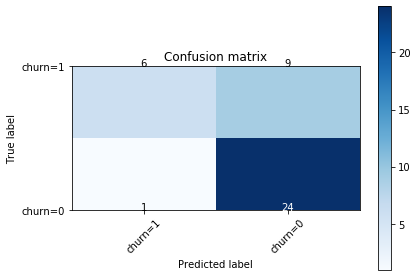

In [17]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

Mira la primera fila. La primera fila es para clientes cuyo valor de abandono real en el conjunto de prueba es 1.
Como puede calcular, de 40 clientes, el valor de abandono de 15 de ellos es 1.
Y de estos 15, el clasificador predijo correctamente 6 de ellos como 1 y 9 de ellos como 0.

Significa que, para 6 clientes, el valor de rotación real era 1 en el conjunto de prueba, y el clasificador también predijo correctamente esos como 1. Sin embargo, mientras que la etiqueta real de 9 clientes era 1, el clasificador predijo aquellos como 0, lo que no es muy bueno . Podemos considerarlo como un error del modelo para la primera fila.

¿Qué pasa con los clientes con valor de abandono 0? Veamos la segunda fila.
Parece que había 25 clientes cuyo valor de abandono era 0.


El clasificador predijo correctamente 24 de ellos como 0, y uno de ellos erróneamente como 1. Por lo tanto, ha hecho un buen trabajo al predecir a los clientes con un valor de abandono 0. Lo bueno de la matriz de confusión es que muestra la capacidad del modelo para predecir correctamente o separar las clases. En el caso específico del clasificador binario, como este ejemplo, podemos interpretar estos números como el recuento de verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos.


In [18]:
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.86      0.40      0.55        15

    accuracy                           0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



En función del recuento de cada sección, podemos calcular la precisión y la recuperación de cada etiqueta:


- __Precision__ es una medida de la precisión siempre que se haya predicho una etiqueta de clase. Se define por: precision = TP / (TP + FP)

- __Recall__ Es verdadera tasa positiva. Se define como: Recall  =  TP / (TP + FN)

    
Entonces, podemos calcular la precisión y la recuperación de cada clase.

__F1 score:__
Ahora estamos en condiciones de calcular los puntajes F1 para cada etiqueta en función de la precision y recall  de esa etiqueta.

El puntaje F1 es el promedio armónico de precisión y recuperación, donde una puntuación F1 alcanza su mejor valor en 1 (precisión y recuperación perfecta) y peor en 0. Es una buena manera de mostrar que un clasificador tiene un buen valor para ambas recuperaciones. y precisión.


Y finalmente, podemos decir que la precisión promedio para este clasificador es el promedio de la puntuación f1 para ambas etiquetas, que es 0,72 en nuestro caso.

### log loss  // pérdida de registro
Ahora, intentemos __log loss__ para la evaluación. En la regresión logística, el resultado puede ser la probabilidad de que el abandono del cliente sea sí (o igual a 1). Esta probabilidad es un valor entre 0 y 1.
La pérdida de registro (pérdida logarítmica) mide el rendimiento de un clasificador donde la salida predicha es un valor de probabilidad entre 0 y 1.


In [19]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6017092478101186

## Practice
Intente construir el modelo de Regresión logística nuevamente para el mismo conjunto de datos, pero esta vez, ¿use diferentes valores de __solver__ y __regularization__? ¿Qué es el nuevo valor __logLoss__?

In [20]:
# write your code here
LR2 = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)
yhat_prob2 = LR2.predict_proba(X_test)
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob2))



LogLoss: : 0.61


Double-click __here__ for the solution.

<!-- Your answer is below:
    
LR2 = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)
yhat_prob2 = LR2.predict_proba(X_test)
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob2))

-->

## Want to learn more?

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: [SPSS Modeler](http://cocl.us/ML0101EN-SPSSModeler).

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at [Watson Studio](https://cocl.us/ML0101EN_DSX)

### Thanks for completing this lesson!

Notebook created by: <a href = "https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>

<hr>
Copyright &copy; 2018 [Cognitive Class](https://cocl.us/DX0108EN_CC). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).​